In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
nifty_data = pd.read_csv("nifty_data.csv")
banknifty_data = pd.read_csv("banknifty_data.csv")

nifty_df = pd.DataFrame(nifty_data)
banknifty_df = pd.DataFrame(banknifty_data)

In [40]:
nifty_df.columns = nifty_df.columns.str.strip()
banknifty_df.columns = banknifty_df.columns.str.strip()
# Both data frames got columns with extra spaces so removing them
nifty_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [41]:
# There is one row with null values in shares traded and turnover so replacing with means
nifty_df['Shares Traded'] = nifty_df['Shares Traded'].fillna(nifty_df['Shares Traded'].mean())
nifty_df['Turnover (₹ Cr)'] = nifty_df['Turnover (₹ Cr)'].fillna(nifty_df['Turnover (₹ Cr)'].mean())

banknifty_df['Shares Traded'] = banknifty_df['Shares Traded'].fillna(banknifty_df['Shares Traded'].mean())
banknifty_df['Turnover (₹ Cr)'] = banknifty_df['Turnover (₹ Cr)'].fillna(banknifty_df['Turnover (₹ Cr)'].mean())

In [42]:
# Changing the format of Date column from object to datetime
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'], format='mixed')
nifty_df.head()

banknifty_df['Date'] = pd.to_datetime(banknifty_df['Date'], format='mixed')
banknifty_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2023-10-03,44561.50,44566.30,44243.10,44399.05,192648191.0,8839.94
1,2023-10-04,44108.15,44161.35,43857.50,43964.05,310337941.0,13684.99
2,2023-10-05,44181.35,44391.85,44108.30,44213.35,243397808.0,8920.31
3,2023-10-06,44395.40,44500.70,44242.95,44360.60,157546711.0,5072.44
4,2023-10-09,44057.80,44113.20,43796.75,43886.50,162329888.0,5048.43


In [43]:
# Creating a day column
nifty_df['Day'] = pd.to_datetime(nifty_df['Date']).dt.day_name()

banknifty_df['Day'] = pd.to_datetime(banknifty_df['Date']).dt.day_name()
banknifty_df.head(7)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Day
0,2023-10-03,44561.50,44566.30,44243.10,44399.05,192648191.0,8839.94,Tuesday
1,2023-10-04,44108.15,44161.35,43857.50,43964.05,310337941.0,13684.99,Wednesday
2,2023-10-05,44181.35,44391.85,44108.30,44213.35,243397808.0,8920.31,Thursday
3,2023-10-06,44395.40,44500.70,44242.95,44360.60,157546711.0,5072.44,Friday
4,2023-10-09,44057.80,44113.20,43796.75,43886.50,162329888.0,5048.43,Monday
5,2023-10-10,44027.55,44487.25,44004.55,44360.15,175255784.0,7051.30,Tuesday
6,2023-10-11,44554.90,44710.55,44411.40,44516.90,213743273.0,8163.77,Wednesday


In [44]:
# Creating a separate data frame containing average ranges day-wise
nifty_df['Range'] = (nifty_df['High'] - nifty_df['Low']).abs()
nifty_df = nifty_df[(nifty_df['Day'] != 'Sunday') & (nifty_df['Day'] != 'Saturday')]
banknifty_df['Range'] = (banknifty_df['High'] - banknifty_df['Low']).abs()
banknifty_df = banknifty_df[(banknifty_df['Day'] != 'Saturday') & (banknifty_df['Day'] != 'Sunday')]

range_nifty = nifty_df.groupby('Day')['Range'].mean().reset_index()
range_nifty.columns = ['Day', 'Average Range']
range_banknifty = banknifty_df.groupby('Day')['Range'].mean().reset_index()
range_banknifty.columns = ['Day', 'Average Range']
range_banknifty.head(6)

,Day,Average Range
0,Friday,562.138776
1,Monday,560.594444
2,Thursday,562.394000
3,Tuesday,623.974000
4,Wednesday,619.448980


In [45]:
# Sorting the days in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

range_nifty['Day'] = pd.Categorical(range_nifty['Day'], categories=day_order, ordered=True)
range_nifty = range_nifty.sort_values('Day')

range_banknifty['Day'] = pd.Categorical(range_banknifty['Day'], categories=day_order, ordered=True)
range_banknifty = range_banknifty.sort_values('Day')

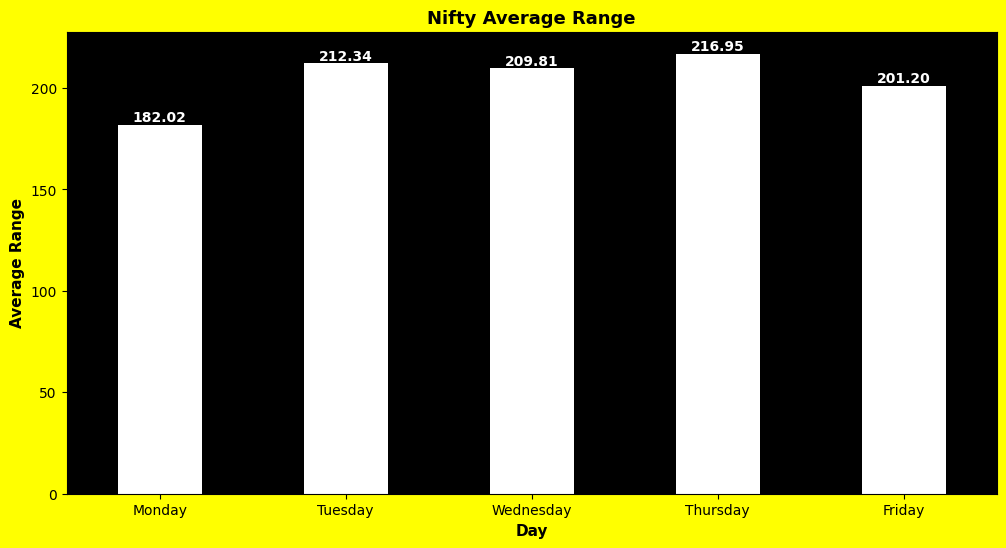

In [46]:
# Plotting the graph for Nifty range
plt.figure(figsize=(12,6), facecolor='yellow')
plt.axes().set_facecolor('#000000')
sns.set_palette('bright')
barplot = sns.barplot(data=range_nifty, x='Day', y='Average Range', width=0.45, color='#ffffff')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%0.2f', color='#ffffff', fontweight='bold')
plt.title('Nifty Average Range', fontweight='bold', fontsize=13)
plt.xlabel('Day', fontweight='bold', fontsize=11)
plt.ylabel('Average Range', fontweight='bold', fontsize=11)
plt.show()

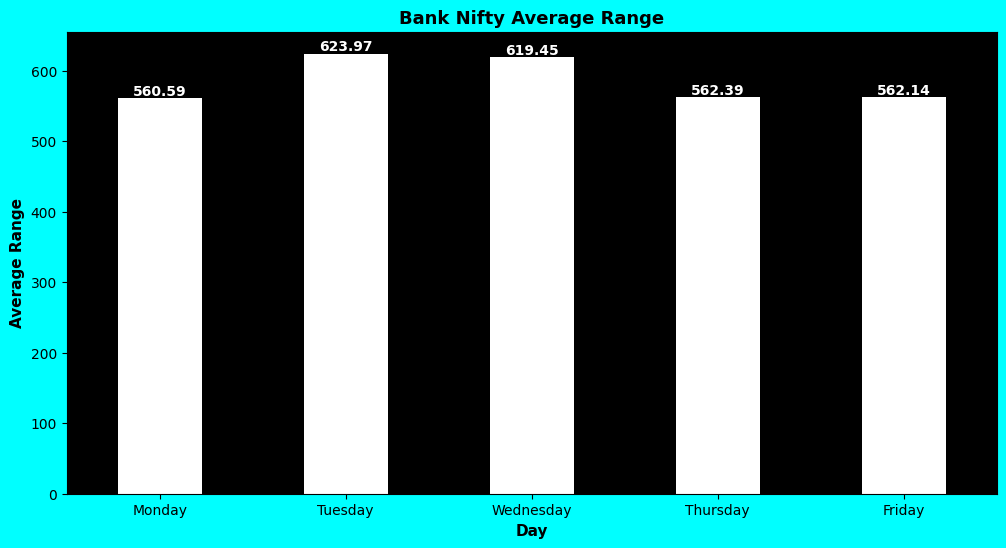

In [47]:
# Plotting the graph for BankNifty range
plt.figure(figsize=(12,6), facecolor='cyan')
plt.axes().set_facecolor('#000000')
sns.set_palette('bright')
barplot = sns.barplot(data=range_banknifty, x='Day', y='Average Range', width=0.45, color='#ffffff')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%0.2f', color='#ffffff', fontweight='bold')
plt.title('Bank Nifty Average Range', fontweight='bold', fontsize=13)
plt.xlabel('Day', fontweight='bold', fontsize=11)
plt.ylabel('Average Range', fontweight='bold', fontsize=11)
plt.show()